In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import random
from scipy.stats import norm
import concurrent.futures
from utilities import *
import matplotlib.pyplot as plt

# Question 1

In [2]:
# init parameters, same for question 1 and 2
m = 2000
d = 2000
s = d/100
beta = 2
iterations = 100*d

## Hyperparameter tuning

In [6]:
test_trick()

0.23384976387023926


In [9]:
# try different beta in order 15 simulations for each, print final loss and number of iterations
repeat_experiment_n = 15
print('beta = 1', run_multiple_experiments(repeat_experiment_n, get_sampling_losses, iterations, 1, m, d)) 
print('beta = 5', run_multiple_experiments(repeat_experiment_n, get_sampling_losses, iterations, 5, m, d))
print('beta = 10', run_multiple_experiments(repeat_experiment_n, get_sampling_losses, iterations, 10, m, d))
print('beta = 20', run_multiple_experiments(repeat_experiment_n, get_sampling_losses, iterations, 20, m, d))
print('beta = 20', run_multiple_experiments(repeat_experiment_n, get_sampling_losses, iterations, 50, m, d))
print('beta = 100', run_multiple_experiments(repeat_experiment_n, get_sampling_losses, iterations, 100, m, d))
print('beta = 1000', run_multiple_experiments(repeat_experiment_n, get_sampling_losses, iterations, 1000, m, d))
print('beta = 1e4', run_multiple_experiments(repeat_experiment_n, get_sampling_losses, iterations, 1e4, m, d))
print('beta = 5e4', run_multiple_experiments(repeat_experiment_n, get_sampling_losses, iterations, 1e5, m, d))

KeyboardInterrupt: 

In [20]:
# very wide space to search on

best_mse = math.inf
best_n_iterations = math.inf
best_params = None

repeat_experiment_n = 1
for beta_start in [100, 500, 1000]: 
    for increse_every in [10, 100, 1000, 2000]: 
        for multiplicative_increase in [1.001, 1.01, 1.1, 1.2]:
            mse, required_iterations = run_multiple_experiments(repeat_experiment_n, get_simulation_annealing_losses, iterations, beta_start, m, d, increse_every, lambda x : x * multiplicative_increase)
            if mse <= best_mse and required_iterations <= best_n_iterations: 
                best_mse = mse
                best_n_iterations = required_iterations
                best_params_and_scores = {'beta_start': beta_start, 'increase_every': increse_every, 'multiplicative_increase' : multiplicative_increase}

print(best_mse, best_n_iterations)
print(best_params_and_scores)

/home/stefano/Documents/EPFL/MC/MC-project/utilities.py:120: RuntimeWarning: overflow encountered in double_scalars
  comp = np.exp(-beta * (noise(X, y, theta1) - noise(X, y, theta)))


KeyboardInterrupt: 

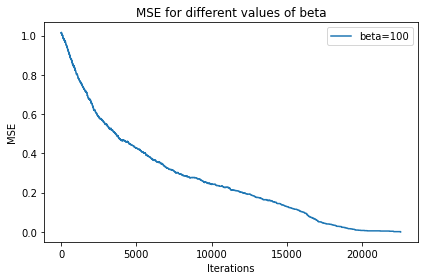

In [6]:

# for different values of beta computes the losses of the samples as we moove through the chain

plt.plot(get_sampling_losses(1000000, 20, m, d), label = 'beta=100')
# plt.plot(get_sampling_losses(iterations, 1000, m, d), label = 'beta=1000')
# plt.plot(get_sampling_losses(iterations, 10000, m, d), label = 'beta=10000')
# plt.plot(get_sampling_losses(iterations, 50000, m, d), label = 'beta=50000')
# plt.plot(get_sampling_losses(iterations, 100000, m, d), label = 'beta=100000')
# plt.plot(get_sampling_losses(iterations, 1000000, m, d), label = 'beta=1000000')


plt.legend()
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.title('MSE for different values of beta')
plt.tight_layout()

plt.savefig('MSE_diferent_beta.jpg')
plt.show()

/home/stefano/Documents/EPFL/projects/MC_project/utilities.py:176: RuntimeWarning: overflow encountered in exp
  # early stopping


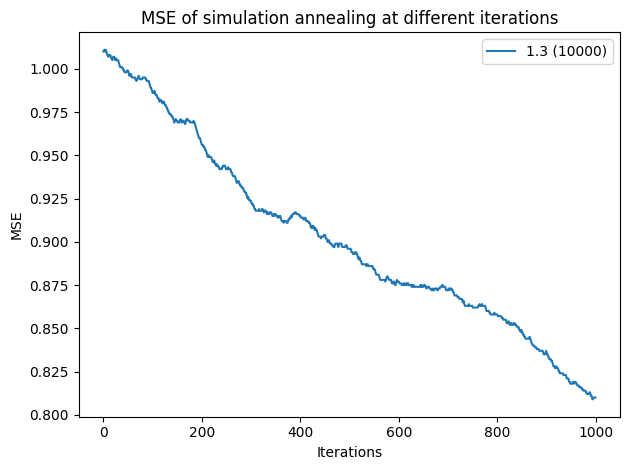

In [117]:
# different strategies of simulation annealing (linear, geometric..)
# test simulation annealing
plt.plot(get_simulation_annealing_losses(1000, 10000, m, d, math.floor(iterations/20), lambda x : x * 1.1), label='1.3 (10000)')
# plt.plot(get_simulation_annealing_losses(iterations, 1000, m, d, math.floor(iterations/20), lambda x : x * 1.1), label='1.1')
# plt.plot(get_simulation_annealing_losses(iterations, 1000, m, d, math.floor(iterations/20), lambda x : x * 1.3), label='1.3')
# plt.plot(get_simulation_annealing_losses(iterations, 1000, m, d, math.floor(iterations/20), lambda x : x * 1.5), label='1.5')
# plt.plot(get_simulation_annealing_losses(iterations, 100, m, d, math.floor(iterations/20), lambda x : x * 1.5), label='1.5 (100)')

plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.title('MSE of simulation annealing at different iterations')
plt.tight_layout()
plt.legend()

plt.savefig('MSE_simulation_annealing.jpg')

In [74]:
# TODO rerurn with full iterations
# don't rerun as it will take a while

# increase the number of samples (m) to find minimum number of samples to 
losses_with_different_m = []
m_values = np.arange(250,2000, 250)

for m_value in  m_values: 
    # for the different values of m only save the last loss (after doing all the iterations)
    print(f'running MC for m={m_value}', end='\r')
    mse, n_iterations = run_multiple_experiments(15, get_sampling_losses, iterations, 10000, m_value, d)
    print(n_iterations)
    losses_with_different_m.append(mse)


plt.plot(m_values, losses_with_different_m) # always changes
plt.ylabel('MSE')
plt.xlabel('Number of samples over dimensions (m/d)')
plt.title('MSE with different number of samples m')
plt.tight_layout()

plt.savefig('q1_ex6_minimum_m_to_recover.jpg')


/home/stefano/Documents/EPFL/MC/MC-project/utilities.py:90: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-beta * (noise(X, y, theta1) - noise(X, y, theta)))
/home/stefano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/stefano/.local/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan
nanning MC for m=500


KeyboardInterrupt: 

# Qeustions 2 

In [135]:
X, y, theta_true, theta = generate_data_fixed_ones(m, d, s)
noise_comp = NoiseComputer(X, y, theta)
errors = []

for _ in range(10): 
    
    theta1 = theta.copy()
    
    zeros_indices = np.where(theta == 0)[0]
    ones_indices = np.where(theta == 1)[0]
    pos_zero = np.random.choice(zeros_indices)
    pos_one = np.random.choice(ones_indices)
    
    # switch position between one 1 and one 0
    theta1[pos_zero] = 1
    theta1[pos_one] = 0

    residual, old_noise = noise_comp.compute_noise_fixed_ones(theta)
    residual, new_noise = noise_comp.compute_noise_fixed_ones(theta1) 

    print(noise(X, y, theta1)) 
    print(new_noise)
    
    comp = np.exp(-beta * (new_noise - old_noise))
    acceptance = min(1, comp)

    # change state with acceptance probability
    if np.random.rand(1)[0] < acceptance : 
        noise_comp.update_theta_residual(theta1, residual)
        theta = theta1

    # compute error
    mse_val = ((theta-theta_true)**2).sum()*(1/(2*s))
    errors.append(mse_val)

    # early stopping
    if mse_val == 0: 
        break

41.40700426615364
41.40700426615365
40.86903381537269
40.86903381537269
40.94651754808336
40.94651754808336
41.10714534413877
41.10714534413877
41.959623867731175
41.959623867731175
41.96421944466128
41.96421944466128
42.61954599207279
42.61954599207279
41.85290652596423
41.85290652596423
42.37290922994213
42.37290922994213
41.94182069085456
41.94182069085456


/home/stefano/Documents/EPFL/projects/MC_project/utilities.py:221: RuntimeWarning: overflow encountered in exp
  residual, new_noise = noise_comp.compute_noise_fixed_ones(theta1)


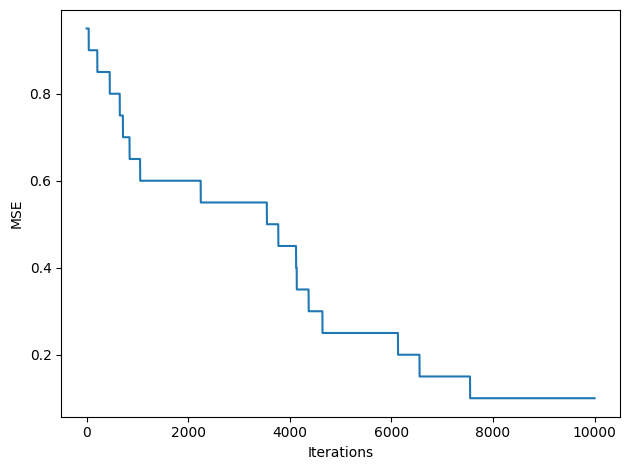

In [142]:
plt.plot(get_sampling_losses_fixed_ones(10000, 10000, 1000, d, s))
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.tight_layout()

plt.savefig('MSE_fixed_ones.jpg')

In [5]:
# run multiple times and take the average

losses_with_different_m1 = []
m_values = np.arange(10, 250, 10)
for m_value in  m_values: 
    print(f'running MC for m={m_value}', end='\r')
    losses_with_different_m1.append(get_sampling_losses_fixed_ones(iterations, 0.1, m_value, d, s)[-1])

plt.plot(m_values , losses_with_different_m1) 

plt.ylabel('MSE')
plt.xlabel('Number of samples over dimensions (m/d)')
plt.title('MSE with different number of samples m')
plt.tight_layout()

plt.savefig('q2_ex6_minimum_m_to_recover.jpg')

KeyboardInterrupt: 

# Question 3

In [5]:
class NoiseComputer1: 
    def __init__(self, X, y, theta): 
        self.X = X
        self.y = y
        self.theta = theta
        self.residual = X @ theta

        self.min_one_indices = np.where(y == -1)[0]
        self.ones_indices = np.where(y == 1)[0]
    
    def compute_noise_fixed_ones(self, new_theta): 
        
        if (self.theta == new_theta).all(): 
            return self.residual, self.loss(self.residual)

        # element that became 0 will have -1 the one that became one will have +1 
        difference =    new_theta - self.theta
        indices = np.nonzero(difference)[0]

        column0 = self.X[:, indices[0]] * difference[indices[0]]
        column1 = self.X[:, indices[1]] * difference[indices[1]]
        new_residual = self.residual + np.squeeze(column0) +  np.squeeze(column1) 

        return new_residual, self.loss(new_residual)

    def loss(self, residual): 
        #print('inputt', X @ theta)
        alpha = norm.cdf((residual) / 1)
        #print('alpha', alpha)
        return -(np.log(alpha[self.ones_indices]).sum() + np.log(1 - alpha[self.min_one_indices]).sum())
        
    def update_theta_residual(self, theta, residual): 
        self.theta = theta
        self.residual = residual


def log_likelihood(X, y, theta): 
    
    min_one_indices = np.where(y == -1)[0]
    ones_indices = np.where(y == 1)[0]
    
    #print('inputt', X @ theta)
    alpha = norm.cdf((X @ theta) / 1)
    #print('alpha', alpha)
    return -(np.log(alpha[ones_indices]).sum() + np.log(1 - alpha[min_one_indices]).sum())

189.14353041591966 189.14353041591966
171.31044267470187 171.31044267470187
171.31044267470187 171.31044267470187
138.71015854404357 138.71015854404357
138.71015854404357 138.71015854404357
148.74910114667398 148.74910114667398
138.71015854404357 138.71015854404357
196.7148054105137 196.7148054105137
138.71015854404357 138.71015854404357
176.32558127002562 176.32558127002562
138.71015854404357 138.71015854404357
156.86038431880795 156.86038431880797
138.71015854404357 138.71015854404357
161.75707158804863 161.75707158804863
138.71015854404357 138.71015854404357
168.02884107250384 168.02884107250384
138.71015854404357 138.71015854404357
176.9402109642976 176.9402109642976
138.71015854404357 138.71015854404357
166.34395151718695 166.34395151718695


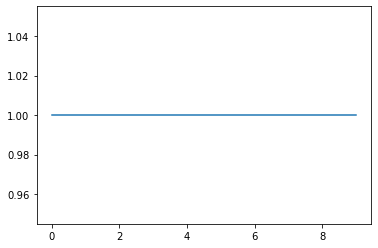

In [6]:
m3 = 100
d3 = 500
s3 = d3/100

def get_sampling_losses_sign(iterations, beta, m, d, s):

    X, y, theta_true, theta = generate_data_sign(m, d, s)
    noise_comp = NoiseComputer1(X, y, theta)
    errors = []

    for _ in range(iterations): 
        
        theta1 = theta.copy()
        
        zeros_indices = np.where(theta == 0)[0]
        ones_indices = np.where(theta == 1)[0]
        pos_zero = np.random.choice(zeros_indices)
        pos_one = np.random.choice(ones_indices)
        
        theta1[pos_zero] = 1
        theta1[pos_one] = 0


        residual, old_noise = noise_comp.compute_noise_fixed_ones(theta)
        residual, new_noise = noise_comp.compute_noise_fixed_ones(theta1) 

        print(log_likelihood(X, y, theta), old_noise)
        print(log_likelihood(X, y, theta1), new_noise)



        comp = np.exp(-beta * (new_noise - old_noise))
        acceptance = min(1, comp)

        # change state with acceptance probability
        if np.random.rand(1)[0] < acceptance : 
            noise_comp.update_theta_residual(theta1, residual)
            theta = theta1

        # compute error
        mse_val = ((theta-theta_true)**2).sum()*(1/(2*s))
        errors.append(mse_val)

        # early stopping
        if mse_val == 0: 
            break

    return errors


m3 = 100
d3 = 500
s3 = d3/100
#beta = 2
iterations3 = 100*d3

loss = get_sampling_losses_sign(10, 1, m3, d3, s3)
plt.plot(loss)

In [ ]:
losses_with_different_m1 = []
m_values = np.arange(1, 120, 10)
for m_value in m_values: 
    print(f'running MC for m={m_value}', end='\r')
    losses_with_different_m1.append(get_sampling_losses_sign(iterations, 5, m_value, d, s)[-1])

plt.plot(m_values, losses_with_different_m1) 

plt.ylabel('MSE')
plt.xlabel('Number of samples over dimensions (m)')
plt.title('MSE with different number of samples m')
plt.tight_layout()

plt.savefig('q3_ex3_minimum_m_to_recover.jpg')

In [22]:
a = np.array([1,12,3,4])
a += a
a

array([ 2, 24,  6,  8])